# PCA for Reduced Dimensionality in Clustering:

<p>For this problem you will use an image segmentation data set for clustering. You will experiment with using PCA as an approach to reduce dimensionality and noise in the data. You will compare the results of clustering the data with and without PCA using the provided image class assignments as the ground truth. The data set is divided into three files. The file "segmentation_data.txt" contains data about images with each line corresponding to one image. Each image is represented by 19 features (these are the columns in the data and correspond to the feature names in the file "segmentation_names.txt". The file "segmentation_classes.txt" contains the class labels (the type of image) and a numeric class label for each of the corresponding images in the data file. After clustering the image data, you will use the class labels to measure completeness and homogeneity of the generated clusters.</p>

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt

### a. Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.

##### Load the image data:

In [2]:
imageFileName = r'../../data/segmentation_data/segmentation_data.txt'
segmentationData = np.genfromtxt(imageFileName, delimiter=',', dtype=str)

In [3]:
segmentationData.shape

(2100, 19)

In [4]:
type(segmentationData)

numpy.ndarray

#### Load the column names data:

In [5]:
columnFileName =  r'../../data/segmentation_data/segmentation_names.txt'
segmentationNames = np.loadtxt(columnFileName, dtype = str)

In [6]:
segmentationNames

array(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN',
       'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN',
       'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN',
       'HUE-MEAN'], dtype='<U20')

#### Load the classes:

In [7]:
classFileName =  r'../../data/segmentation_data/segmentation_classes.txt'
segmentationClasses = np.loadtxt(classFileName, dtype = str)

In [8]:
segmentationClasses

array([['GRASS', '0'],
       ['GRASS', '0'],
       ['GRASS', '0'],
       ...,
       ['CEMENT', '3'],
       ['CEMENT', '3'],
       ['CEMENT', '3']], dtype='<U9')

In [9]:
segmentationClasses.shape

(2100, 2)

#### Let's create a SegmentationData Data frame:

In [10]:
df_segmentationData = pd.DataFrame(data = segmentationData, columns=segmentationNames)

In [11]:
df_segmentationData.head() # display the first 5 records

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.0000004,0.66666675,1.2222223,1.1863422,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.50813884,1.9108642
1,86.0,187.0,9,0.0,0.0,1.1111108,0.7200825,1.4444445,0.750309,13.740741,11.666667,10.333334,19.222221,-6.2222223,-10.222222,16.444445,19.222221,0.46332908,1.9414649
2,225.0,244.0,9,0.0,0.0,3.3888886,2.1951127,2.9999998,1.5202343,12.259259,10.333334,9.333334,17.11111,-5.7777777,-8.777778,14.555555,17.11111,0.48014903,1.9879022
3,47.0,232.0,9,0.0,0.0,1.2777778,1.254621,1.0,0.8944273,12.703704,11.0,9.0,18.11111,-5.111111,-11.111111,16.222221,18.11111,0.50096595,1.875362
4,97.0,186.0,9,0.0,0.0,1.1666671,0.6912147,1.1666671,1.0055404,15.592592,13.888889,11.777778,21.11111,-5.111111,-11.444445,16.555555,21.11111,0.44266057,1.8636538


<p>The segmentation data 2100 data about images and each image is represented by 19 features.</p>

#### Let's create a segmentationClasses Data Frame.

In [12]:
df_segmentationClasses = pd.DataFrame(data = segmentationClasses, columns = ['classLabel', 'classCode'])

In [13]:
print(df_segmentationClasses.shape)
df_segmentationClasses.head()

(2100, 2)


,classLabel,classCode
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


####  Using sklearn's min-max scaler Perform min-max normalization on the data matrix so that each feature is scaled to [0, 1] range

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
vs_segmentationData = min_max_scaler.fit_transform(segmentationData)
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(vs_segmentationData.shape)
vs_segmentationData[0:5]

(2100, 19)


array([[0.43, 0.74, 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.09, 0.08, 0.06, 0.13, 0.73, 0.01, 0.87, 0.12, 0.51,
        0.83],
       [0.34, 0.73, 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.1 , 0.09, 0.07, 0.13, 0.73, 0.02, 0.86, 0.13, 0.46,
        0.84],
       [0.89, 0.97, 0.  , 0.  , 0.  , 0.12, 0.  , 0.07, 0.  , 0.09, 0.08, 0.06, 0.12, 0.74, 0.04, 0.83, 0.11, 0.48,
        0.84],
       [0.18, 0.92, 0.  , 0.  , 0.  , 0.04, 0.  , 0.02, 0.  , 0.09, 0.08, 0.06, 0.13, 0.75, 0.01, 0.86, 0.12, 0.5 ,
        0.83],
       [0.38, 0.73, 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.11, 0.1 , 0.08, 0.15, 0.75, 0.01, 0.86, 0.14, 0.44,
        0.82]])

### b. Next, Perform Kmeans clustering (for this problem, use the Kmeans implementation in scikit-learn) on the image data (since there are a total 7 pre-assigned image classes, you should use K = 7 in your clustering). Use Euclidean distance as your distance measure for the clustering.  Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [15]:
KMeans_cl = KMeans(n_clusters = 7)
KMeans_cl.fit(vs_segmentationData)

KMeans(n_clusters=7)

In [16]:
KMeans_cl.cluster_centers_.shape

(7, 19)

In [17]:
transformedClusterCenters = KMeans_cl.cluster_centers_.T
print(transformedClusterCenters.shape)
transformedClusterCenters

(19, 7)


array([[0.25, 0.54, 0.51, 0.3 , 0.77, 0.75, 0.25],
       [0.39, 0.15, 0.81, 0.53, 0.43, 0.53, 0.46],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.08, 0.03, 0.08, 0.05, 0.01, 0.04, 0.03],
       [0.02, 0.  , 0.01, 0.05, 0.02, 0.04, 0.01],
       [0.08, 0.03, 0.05, 0.1 , 0.04, 0.11, 0.04],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  ],
       [0.06, 0.03, 0.05, 0.08, 0.02, 0.11, 0.03],
       [0.01, 0.  , 0.  , 0.01, 0.  , 0.02, 0.  ],
       [0.15, 0.82, 0.11, 0.4 , 0.04, 0.3 , 0.03],
       [0.14, 0.78, 0.09, 0.37, 0.03, 0.28, 0.02],
       [0.18, 0.89, 0.09, 0.47, 0.06, 0.35, 0.04],
       [0.12, 0.79, 0.14, 0.35, 0.03, 0.26, 0.02],
       [0.72, 0.27, 0.68, 0.5 , 0.78, 0.59, 0.77],
       [0.34, 0.67, 0.08, 0.57, 0.22, 0.45, 0.22],
       [0.35, 0.29, 0.82, 0.21, 0.49, 0.31, 0.51],
       [0.18, 0.89, 0.13, 0.47, 0.06, 0.35, 0.04],
       [0.41, 0.21, 0.41, 0.3 , 0.54, 0.3 , 0.8 ],
       [0.2 , 0.13, 0.89, 0.16, 0.24, 0.16, 0.18]])

#### Print the cluster centroids (use some formatting so that they are visually understandable).

In [18]:
# Using Panda let's create a DataFrame
# convert segmentationNames into a list which can used as an index
clusterCentroids = pd.DataFrame(transformedClusterCenters, index = segmentationNames.tolist(), columns = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7'])
clusterCentroids = clusterCentroids.round(decimals = 2)
print(clusterCentroids.shape)
clusterCentroids

(19, 7)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
REGION-CENTROID-COL,0.25,0.54,0.51,0.30,0.77,0.75,0.25
REGION-CENTROID-ROW,0.39,0.15,0.81,0.53,0.43,0.53,0.46
REGION-PIXEL-COUNT,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SHORT-LINE-DENSITY-5,0.08,0.03,0.08,0.05,0.01,0.04,0.03
SHORT-LINE-DENSITY-2,0.02,0.00,0.01,0.05,0.02,0.04,0.01
VEDGE-MEAN,0.08,0.03,0.05,0.10,0.04,0.11,0.04
VEDGE-SD,0.00,0.00,0.00,0.01,0.00,0.02,0.00
HEDGE-MEAN,0.06,0.03,0.05,0.08,0.02,0.11,0.03
HEDGE-SD,0.01,0.00,0.00,0.01,0.00,0.02,0.00
INTENSITY-MEAN,0.15,0.82,0.11,0.40,0.04,0.30,0.03


<p>This is the summary of Clusters: 1, 2, 3, 4, 5, 6, and 7.</p> 
<p>REGION-CENTROID-COL stands out in both Cluster 6 and 7. REGION-CENTROID-ROW stands out in cluster 3 as defined by the cluster centroid of 0.81. INTENSITY-MEAN is well defined in cluster 2, RAWBLUE-MEAN is well defined in cluster2, HUE-MEAN is well defined in cluster 3.Looking at REGION-PIXEL-COUNT, it is not clearly defined in any of the seven clusters as its centroid is 0.00 in all of the clusters.</p>

#### Compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [19]:
print('The completness of the generated clusters is %.2f' %(completeness_score(df_segmentationClasses['classCode'], KMeans_cl.labels_)))
print('')
print('The homogeneity of the generated clusters is %.2f' %(homogeneity_score(df_segmentationClasses['classCode'], KMeans_cl.labels_)))

The completness of the generated clusters is 0.61

The homogeneity of the generated clusters is 0.61


<p>The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.</p>
<p>The completeness and homogeneity scores of 0.61 are not bad scores asthey are definately approaching 1.</p>

### c. Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Then use these r components as features to transform the data into a reduced dimension space. 

#### let's derive PCA using the Decomposition module in scikit-learn. 

In [20]:
pcaImages = decomposition.PCA(n_components = 10)
imagesTransformed_pca = pcaImages.fit_transform(vs_segmentationData)
imagesTransformed_pca

array([[-0.69,  0.53,  0.25, ..., -0.  ,  0.  , -0.  ],
       [-0.67,  0.51,  0.34, ..., -0.02,  0.  , -0.01],
       [-0.71,  0.77, -0.16, ...,  0.05, -0.05,  0.04],
       ...,
       [-0.51, -0.13, -0.08, ...,  0.03, -0.01, -0.08],
       [-0.48, -0.09, -0.16, ...,  0.03, -0.03, -0.05],
       [-0.44, -0.11, -0.05, ...,  0.13, -0.05, -0.11]])

#### Let's convert the imagesTransformed_pca into pandas which is more friendly.

In [21]:
df_principalComponent = pd.DataFrame(data = imagesTransformed_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_principalComponent = df_principalComponent.round(decimals = 2)
df_principalComponent

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.69,0.53,0.25,-0.20,-0.08,0.05,-0.05,-0.00,0.00,-0.00
1,-0.67,0.51,0.34,-0.17,-0.04,0.06,-0.04,-0.02,0.00,-0.01
2,-0.71,0.77,-0.16,-0.01,-0.17,0.04,-0.06,0.05,-0.05,0.04
3,-0.73,0.51,0.50,-0.06,-0.14,0.03,-0.10,0.03,-0.01,-0.01
4,-0.64,0.53,0.30,-0.18,-0.02,0.05,-0.06,0.01,-0.00,-0.01
...,...,...,...,...,...,...,...,...,...,...
2095,-0.50,-0.26,0.27,0.11,-0.01,-0.01,-0.10,0.01,-0.01,-0.08
2096,-0.50,-0.26,0.38,0.15,0.03,-0.20,0.14,0.12,-0.05,-0.13
2097,-0.51,-0.13,-0.08,0.10,-0.03,-0.03,-0.11,0.03,-0.01,-0.08
2098,-0.48,-0.09,-0.16,0.11,0.00,-0.00,-0.09,0.03,-0.03,-0.05


<p>Below, we learn that the 95% of the variance is explained by the first 7 components:</p>

In [22]:
pcaImages.explained_variance_ratio_

array([0.61, 0.13, 0.1 , 0.05, 0.04, 0.02, 0.02, 0.02, 0.01, 0.01])

#### We can plot the principal components based on the percentage of variance they capture:

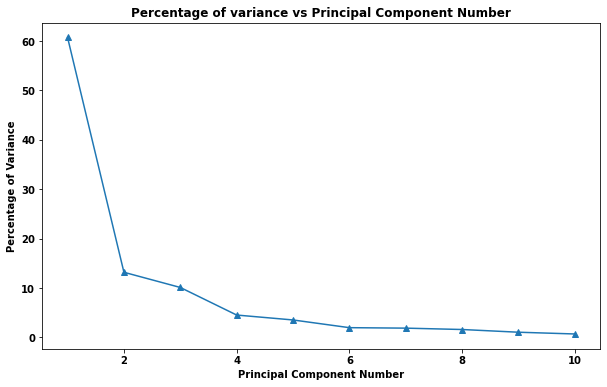

In [23]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
    # multiply explained_variance_ratio_ by 100 to express the number in percentages
ax.plot(range(1, 11), pcaImages.explained_variance_ratio_ * 100, marker='^') 
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.title('Percentage of variance vs Principal Component Number')
plt.show()

<p>From the above scree plot, we notice that pca = 4 is more viable, but we can also try 5 components.</p>

#### Let's derive a list of explained  variance ratios:

In [24]:
numOfPCs = 0
varianceRatio = 0
for num in pcaImages.explained_variance_ratio_:
    numOfPCs += 1
    varianceRatio += num * 100
    print('PC%s contains %.2f%% of the variance.' %(str(numOfPCs), varianceRatio))

PC1 contains 60.71% of the variance.
PC2 contains 73.91% of the variance.
PC3 contains 84.03% of the variance.
PC4 contains 88.58% of the variance.
PC5 contains 92.13% of the variance.
PC6 contains 94.11% of the variance.
PC7 contains 96.01% of the variance.
PC8 contains 97.62% of the variance.
PC9 contains 98.69% of the variance.
PC10 contains 99.40% of the variance.


<p>We discover that the first seven principle components <strong>PC1, PC2, PC3, PC4, PC5, PC6 and PC7 </strong> explain atleast 96% of the variance as demonstrated above.</p>

#### Let's ignore the last three 3 columns of our transformed data so that we remain with only 7 columns in the reduced dimension space:

In [25]:
reducedDim_SegmentationData = imagesTransformed_pca[:, :-3]
reducedDim_SegmentationData

array([[-0.69,  0.53,  0.25, ..., -0.08,  0.05, -0.05],
       [-0.67,  0.51,  0.34, ..., -0.04,  0.06, -0.04],
       [-0.71,  0.77, -0.16, ..., -0.17,  0.04, -0.06],
       ...,
       [-0.51, -0.13, -0.08, ..., -0.03, -0.03, -0.11],
       [-0.48, -0.09, -0.16, ...,  0.  , -0.  , -0.09],
       [-0.44, -0.11, -0.05, ...,  0.02, -0.21,  0.15]])

<p>Above we have our reduced dimension space transformed data set.</p>

### d. Perform Kmeans again, but this time on the lower dimensional transformed data. Then, compute the Completeness and Homogeneity values of the new clusters.

In [39]:
KMeans_cl = KMeans(n_clusters = 7)
KMeans_cl.fit(reducedDim_SegmentationData)

KMeans(n_clusters=7)

In [34]:
KMeans_cl.cluster_centers_

array([[ 1.41,  0.09,  0.04, -0.17, -0.03, -0.01, -0.02],
       [-0.21, -0.25,  0.15,  0.06,  0.13, -0.01,  0.03],
       [ 0.18,  0.04, -0.26,  0.18,  0.03,  0.02,  0.  ],
       [-0.62,  0.64,  0.2 , -0.09, -0.07,  0.01,  0.04],
       [-0.6 , -0.36,  0.11, -0.13, -0.13, -0.02, -0.04],
       [-0.51, -0.06, -0.34, -0.07,  0.08,  0.01, -0.03],
       [ 0.44, -0.11,  0.17,  0.23, -0.05, -0.01,  0.02]])

In [40]:
print('The completness of the generated clusters is %.2f' %(completeness_score(df_segmentationClasses['classCode'], KMeans_cl.labels_)))
print('')
print('The homogeneity of the generated clusters is %.2f' %(homogeneity_score(df_segmentationClasses['classCode'], KMeans_cl.labels_)))

The completness of the generated clusters is 0.61

The homogeneity of the generated clusters is 0.61


<p>As previously seen, the completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.</p>
<p>The completeness and homogeneity scores of 0.61 are not bad scores asthey are definately approaching 1.</p>

#### e. Discuss your observations based on the comparison of the two clustering results.

<p> In both part b and d, we got the same completeness and homogeneity scores of 0.61. In part d, <strong>PCA</strong> helps to reduce the number of features while preserving the variance.</p>